### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
df=pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Extracting features and label in  separate variables 'X' and 'y'

In [4]:
X=df.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y=df['Concrete compressive strength(MPa, megapascals) ']

### Converting X,y into numpy array

In [5]:
X_np=X.to_numpy()
y_np=y.to_numpy()

### Spliting dataset into training and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.3, random_state=1)

#  <font color='blue'>  Implementing batch gradient from scratch in Python, with input data normalization </font>

In [34]:
class LinearRegression_with_norm:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.cost_history = []  # Initialize the cost history
        
    def fit(self, X, y):
        # Normalize the input data
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Add a column of ones for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Initialize the weights and biases
        self.weights = np.zeros(X.shape[1])
        
        # Perform batch gradient descent
        for i in range(self.num_iterations):
            y_pred = X @ self.weights
            error = y_pred - y
            gradient = X.T @ error / X.shape[0]
            self.weights -= self.learning_rate * gradient
            
            # Calculate the mean squared error for current iteration
            mse = np.mean(error**2)
            self.cost_history.append(mse)
            
    def predict(self, X):
        # Normalize the input data
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Add a column of ones for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute the predictions
        y_pred = X @ self.weights
        return y_pred
    def plot_convergence(self):
        # Plot the convergence of the cost function
        plt.plot(range(1, self.num_iterations + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Convergence Plot')
        plt.show()

### Performance metrics definition

In [8]:
class RegressionMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        
    def mse(self):
        return np.mean((self.y_true - self.y_pred)**2)
    
    def r2_score(self):
        y_mean = np.mean(self.y_true)
        ss_tot = np.sum((self.y_true - y_mean)**2)
        ss_res = np.sum((self.y_true - self.y_pred)**2)
        return 1 - (ss_res / ss_tot)


### Model training and results

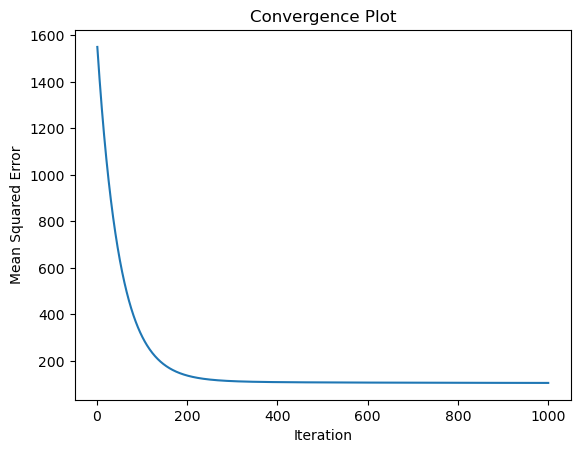

Mean squared error:   121.96511110433124
R squared error:    0.5346751632550453


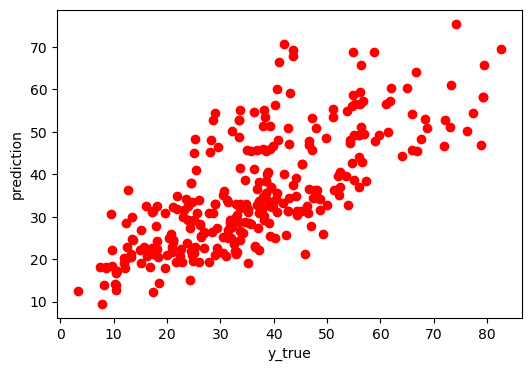

In [41]:
lr_wn1 = LinearRegression_with_norm(0.01,1000)
lr_wn1.fit(X_train, y_train)
y_pred3 = lr_wn1.predict(X_test)

lr_wn1.plot_convergence()

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred3,color='red');
plt.xlabel('y_true');
plt.ylabel('prediction');

metrics1 = RegressionMetrics(y_test, y_pred3)
mse = metrics1.mse()
r2 = metrics1.r2_score()
print('Mean squared error:  ',mse)
print('R squared error:   ',r2)


# <font color='blue'>Implementing stochastic gradient descent (SGD) from scratch in Python, with input data normalization</font>

In [47]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.cost_history = []  # Initialize the cost history
    
    def fit(self, X, y):
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        
        for i in range(self.n_iters):
            for j in range(n_samples):
                y_pred = np.dot(X[j], self.weights)
                error = y_pred - y[j]
                self.weights -= self.learning_rate * error * X[j]
             # Calculate the mean squared error for current iteration
            mse = np.mean(error**2)
            self.cost_history.append(mse)
    
    def predict(self, X):
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.weights)
    
    def plot_convergence(self):
        # Plot the convergence of the cost function
        plt.plot(range(1, self.n_iters + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Convergence Plot')
        plt.show()

### model training and results

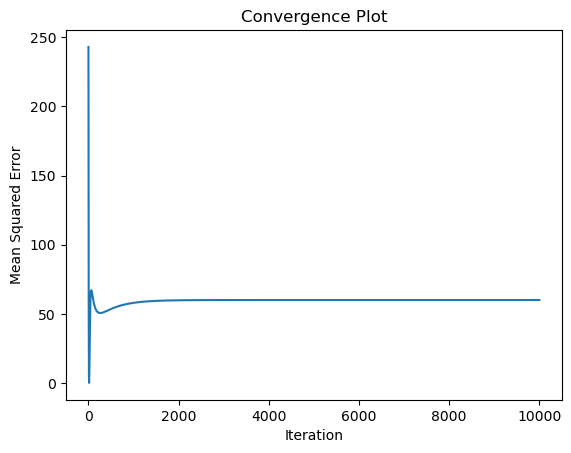

Mean squared error:   119.0303063699709
R squared error:    0.5458721155763231


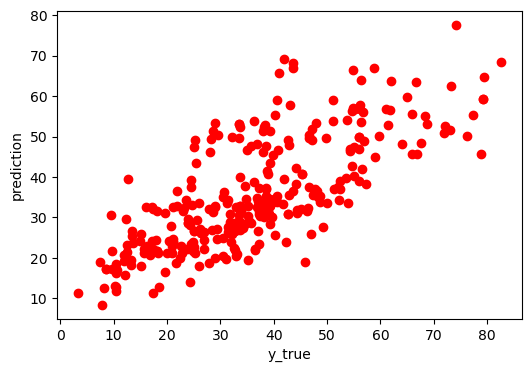

In [53]:
optimizer = StochasticGradientDescent(learning_rate=0.0001, n_iters=10000)
optimizer.fit(X_train, y_train)
optimizer.plot_convergence()

# Make predictions on test data
y_pred7 = optimizer.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred7,color='red');
plt.xlabel('y_true');
plt.ylabel('prediction');

metrics = RegressionMetrics(y_test, y_pred7)
mse = metrics.mse()
r2 = metrics.r2_score()
print('Mean squared error:  ',mse)
print('R squared error:   ',r2)

# <font color='blue'>Implementing mini-batch gradient descent from scratch in Python, with input data normalization</font>

In [56]:
class MiniBatchGradientDescent:
    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.cost_history = []  # Initialize the cost history
        
    def fit(self, X, y):
        # Normalize the input data
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Add a column of ones to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Initialize the weights
        self.weights = np.zeros(X.shape[1])
        
        # Loop over the specified number of epochs
        for _ in range(self.epochs):
            # Shuffle the data
            indices = np.random.permutation(X.shape[0])
            X, y = X[indices], y[indices]
            
            # Loop over the mini-batches
            for i in range(0, X.shape[0], self.batch_size):
                X_batch, y_batch = X[i:i + self.batch_size], y[i:i + self.batch_size]
                
                # Compute the predicted target values
                y_pred = X_batch @ self.weights
                
                # Compute the error
                error = y_batch - y_pred
                
                # Update the weights
                gradient = -2 * X_batch.T @ error / X_batch.shape[0]
                self.weights -= self.learning_rate * gradient
             # Calculate the mean squared error for current iteration
            mse = np.mean(error**2)
            self.cost_history.append(mse)
                
    def predict(self, X):
        # Normalize the input data
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Add a column of ones to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute the predicted target values
        y_pred = X @ self.weights
        
        return y_pred
    
    def plot_convergence(self):
        # Plot the convergence of the cost function
        plt.plot(range(1, self.epochs + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Convergence Plot')
        plt.show()

### model training and results

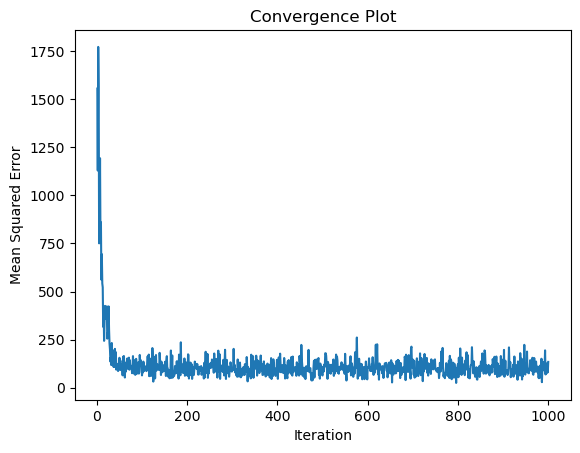

Mean squared error:   119.4898539750006
R squared error:    0.5441188361970746


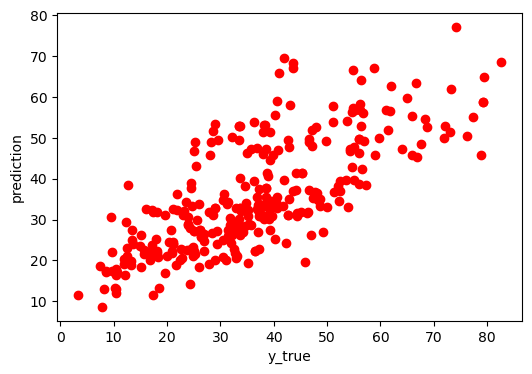

In [61]:
# Create the model
mbgd = MiniBatchGradientDescent(learning_rate=0.001, epochs=1000, batch_size=32)

# Fit the model to the training data
mbgd.fit(X_train, y_train)

mbgd.plot_convergence()

#normalize the test data
X_test_ = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Predict on the test data
y_pred = mbgd.predict(X_test_)

#plotting the results
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,color='red');
plt.xlabel('y_true');
plt.ylabel('prediction');

metrics = RegressionMetrics(y_test, y_pred)
mse = metrics.mse()
r2 = metrics.r2_score()
print('Mean squared error:  ',mse)
print('R squared error:   ',r2)

# <font color='blue'>Implementing 'momentum' gradient descent from scratch in Python, with input data normalization</font>

In [75]:
class GradientDescentWithMomentum:
    def __init__(self, learning_rate=0.01, momentum=0.9, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.momentum = momentum
        self.weights = None
        self.velocity = None
        self.cost_history = []  # Initialize the cost history

    def fit(self, X, y, epochs=1000):
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.zeros(X.shape[1])
        self.velocity = np.zeros(X.shape[1])
        
        for _ in range(self.epochs):
            y_pred = X @ self.weights
            error = y_pred - y
            gradient = X.T @ error / X.shape[0]
            self.velocity = self.momentum * self.velocity + self.learning_rate * gradient
            self.weights -= self.velocity
             # Calculate the mean squared error for current iteration
            mse = np.mean(error**2)
            self.cost_history.append(mse)

    def predict(self, X):
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.weights
    
    def plot_convergence(self):
        # Plot the convergence of the cost function
        plt.plot(range(1, self.epochs + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Convergence Plot')
        plt.show()

### model training and results

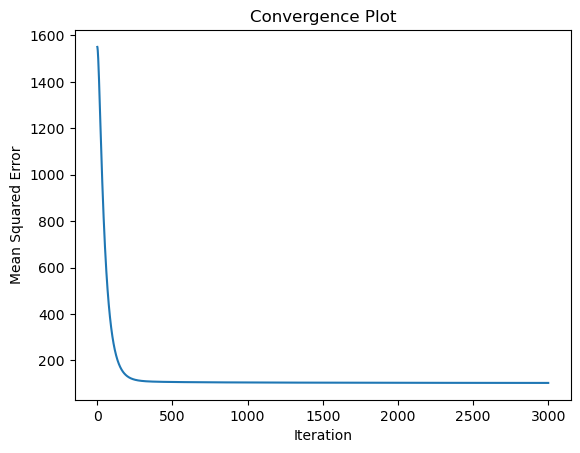

Mean squared error:   119.98918616326377
R squared error:    0.5422137695195531


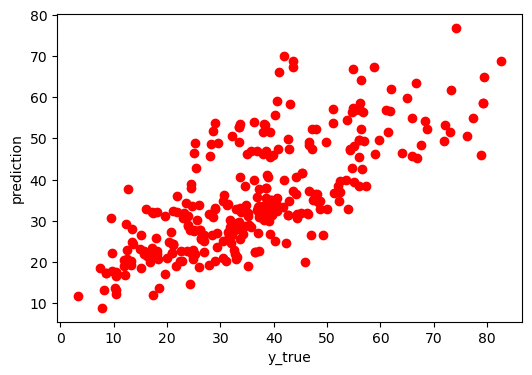

In [84]:
# Create an instance of the gradient descent with momentum model
model = GradientDescentWithMomentum(learning_rate=0.001, momentum=0.9, epochs=3000)

# Fit the model to the training data
model.fit(X_train, y_train, epochs=1000)

model.plot_convergence()

X_test_n = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Make predictions on the test data
y_pred = model.predict(X_test_n)

#plotting the results
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,color='red');
plt.xlabel('y_true');
plt.ylabel('prediction');

metrics = RegressionMetrics(y_test, y_pred)
mse = metrics.mse()
r2 = metrics.r2_score()
print('Mean squared error:  ',mse)
print('R squared error:   ',r2)


# <font color='blue'>Implementing  Nesterov Accelerated Gradient (NAG) Descent from scratch in Python, with input data normalization</font>

In [85]:
import numpy as np

class NAG:
    def __init__(self, learning_rate=0.01, momentum=0.9, max_iter=1000):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.mean = None
        self.std = None
        self.cost_history = []  # Initialize the cost history
    
    def fit(self, X, y):
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        v_w = np.zeros(X.shape[1])
        v_b = 0
        
        for i in range(self.max_iter):
            y_pred = X @ self.weights + self.bias
            dw = -2 * X.T @ (y - y_pred) / len(y)
            db = -2 * np.sum(y - y_pred) / len(y)
            v_w = self.momentum * v_w + self.learning_rate * dw
            v_b = self.momentum * v_b + self.learning_rate * db
            self.weights = self.weights - self.momentum * v_w + (1 + self.momentum) * self.learning_rate * dw
            self.bias = self.bias - self.momentum * v_b + (1 + self.momentum) * self.learning_rate * db
            
             # Calculate the mean squared error for current iteration
            mse = np.mean((y - y_pred)**2)
            self.cost_history.append(mse)
    
    def predict(self, X_test):
        X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
        return X_test @ self.weights + self.bias
    
    def plot_convergence(self):
        # Plot the convergence of the cost function
        plt.plot(range(1, self.max_iter + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Convergence Plot')
        plt.show()

### model training and results

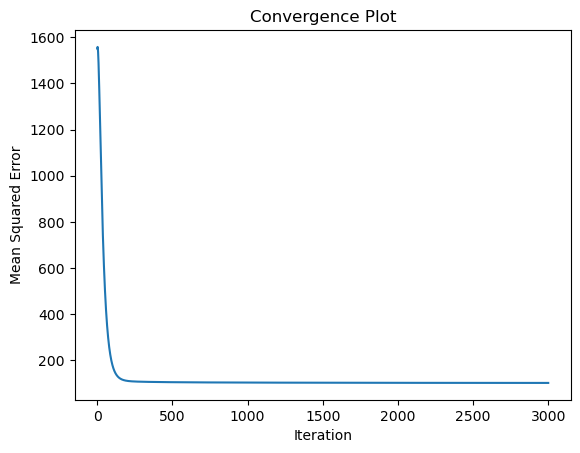

Mean squared error:   119.56622711886094
R squared error:    0.5438274551588684


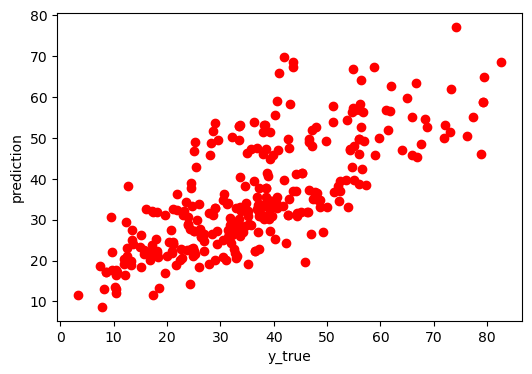

In [94]:
# create an instance of the class
nag = NAG(learning_rate=0.001, momentum=0.9, max_iter=3000)

# fit the model to the training data
nag.fit(X_train, y_train)

nag.plot_convergence()
# make predictions on the test data
y_pred = nag.predict(X_test)

#plotting the results
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,color='red');
plt.xlabel('y_true');
plt.ylabel('prediction');

metrics = RegressionMetrics(y_test, y_pred)
mse = metrics.mse()
r2 = metrics.r2_score()
print('Mean squared error:  ',mse)
print('R squared error:   ',r2)
